Termino luego de  100 iteraciones con un error de  2
Se sugiere incrementar la COTA y/o el eta


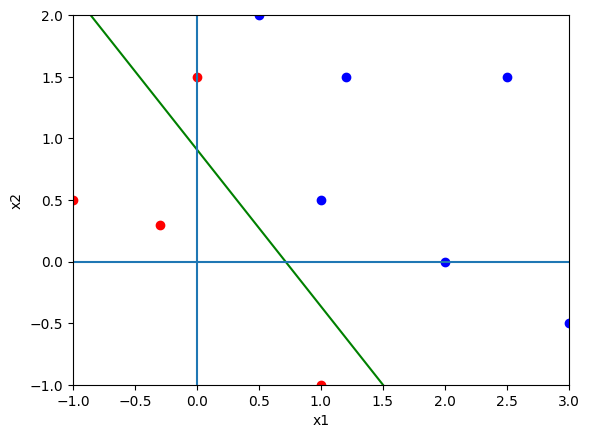

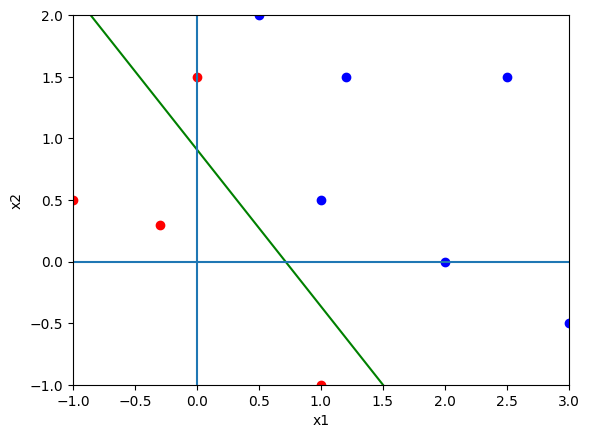

In [2]:
import numpy as np
from matplotlib import pyplot as plt 


def CalcularError(ejemplos, clases, w):
    ctd_ejemplos = len(ejemplos)
    error = 0
    for i_ejemplo in range(0, ctd_ejemplos):    
        x = ejemplos[i_ejemplo]
        suma = 0
        for i in range(0,3):        
            suma += x[i] * w[i]
        if suma >= 0:
            y = 1
        else:
            y = -1
        error += abs(y - clases[i_ejemplo])
    return error

# Definción de ejemplos
# Estructura:
# punto[1.0, x1, x2]
ejemplos = [
        [ 1.0, 0.0,  1.5],
        [ 1.0, 1.2,  1.5], 
        [ 1.0, 0.5,  2.0], 
        [ 1.0, -1.0,  0.5], 
        [ 1.0, -0.3,  0.3], 
        [ 1.0, 2.0,  0.0], 
        [ 1.0, 1.0,  0.5], 
        [ 1.0, 3.0, -0.5], 
        [ 1.0, 1.0, -1.0],
        [ 1.0, 2.5,  1.5]]

clases = [-1, 1, 1, -1, -1, 1, 1, 1, -1,1]

# Cantidad de ejemplos
ctd_ejemplos = len(ejemplos)


# Se inicializa vector en cero de pesos 
w = [0, 0, 0]

error = 1
error_min = ctd_ejemplos * 2
w_min = []

# Indice de iteración con cantidad máxima:
it = 0
COTA = 100

# Tasa de Aprendizaje:
eta = 0.01  
# con la función seed() se fija una semilla de modo que si se vuelve a ejecutar
# este programa volverá a comportarse igual
# si, en cambio, se comenta la siguiente línea
# cada vez que se ejecute cambiará el resultado del programa
# el valor 45 se puede cambiar por otro número y así, por cada número, el 
# programa se comportará diferente
# np.random.seed(45)

while error > 0 and it < COTA:
    i_ejemplo = int(np.random.rand() * ctd_ejemplos)
    x = ejemplos[i_ejemplo]
    suma = 0
    for i in range(0,3):        
        suma += x[i] * w[i]
    if suma >= 0:
        y = 1
    else:
        y = -1
    for i in range(0,3):        
        w[i] = w[i] + eta * (clases[i_ejemplo] - y) * x[i]

    error = CalcularError(ejemplos, clases, w)
    if error < error_min:
        error_min = error
        w_min = w
    it += 1

print ('Termino luego de ', it, 'iteraciones con un error de ', error)
if it >= COTA:
    print('Se sugiere incrementar la COTA y/o el eta')
plt.figure(1)

# calcular los valores máximos y mínimos que toma cada una de las
# componentes de los ejemplos
# además, se grafica cada uno de los ejemplos de color azul o rojo
# dependiendo si pertencen a la clase 1 y -1 respectivamente
x1_min = 1000
x2_min = 1000
x1_max = -1000
x2_max = -1000
for i_ejemplo in range(0, ctd_ejemplos):    
    # poner en x el ejemplo i_ejemplo
    x = ejemplos[i_ejemplo]
    # de acuerdo a las componentes 1 y 2 de x obtener el valor máximo y mínimo
    # de cada una de ellas (recordad que la componente 0 siempre tiene valor 1)
    if x[1] < x1_min:
        x1_min = x[1]
    if x[1] > x1_max:
        x1_max = x[1]
    if x[2] < x2_min:
        x2_min = x[2]
    if x[2] > x2_max:
        x2_max = x[2]
    # dibujar cada ejemplo como una pelotita de color azul o rojo según la clase
    if clases[i_ejemplo] == 1:
        plt.plot(x[1], x[2], 'o', c = 'b')
    else:
        plt.plot(x[1], x[2], 'o', c = 'r')

# dibujar la recta (hiperplano) de separación
# para eso dibujar el segmento que va de (x1_a, x2_a) a (x1_b, x2_b)
x1_a = x1_min
x2_b = x2_min
# contemplar la posibilidad que w[1] y/o w[2] sean 0 (cero)
if not (w[2] == 0.0):
    if not (w[1] == 0.0):
        x2_a = (-w[0] - w[1] * x1_a) / w[2]
        x1_b = (x2_b * w[2] + w[0]) / -w[1]
        plt.plot([x1_a, x1_b], [x2_a, x2_b], '-', c = 'g')
    else:
        x2_a = -w[0] / w[2]
        x2_b = -w[0] / w[2]
        x1_a = x1_min
        x1_b = x1_max
        plt.plot([x1_a, x1_b], [x2_a, x2_b], '-', c = 'g')
else:
    if not (w[1] == 0.0):
        x1_a = -w[0] / w[1]
        x1_b = -w[0] / w[1]
        x2_a = x2_min
        x2_b = x2_max
        plt.plot([x1_a, x1_b], [x2_a, x2_b], '-', c = 'g')


plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim([x1_min, x1_max])
plt.ylim([x2_min, x2_max])
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line

plt.figure(1)